# Read Sage City Forum Data And Output Topics

## Requirements Setup

In [11]:
! pip install lxml
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# For graphing charts
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import plotly.express as px


import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup

# Dataset to process
myFile = '../data/SageCityForumData.xlsx'
GraphTitle = 'Sage City Forum Sentiment'

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Data Exploration and Cleaning

In [12]:
# Read yelp.csv into a DataFrame.
df_Forum = pd.read_excel(myFile, sheet_name='Forum List')
print(df_Forum.shape)
df_Forum.head(10)

(2943, 10)


,ID,Forum ID,Forum Name,Body,Subject,Post Date,User DisplayName,Is Question,Tags,Likes
0,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
1,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
2,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
3,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
4,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
5,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
6,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
7,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
8,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
9,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN


# Clean the html

## Option 1

In [13]:
# def cleanhtml(raw_html):
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr,'',raw_html)
#     return cleantext
# cleanhtml(df_Forum['Body'][0])

## Option 2: BeautifulSoup

In [14]:
def cleanhtml(raw_html):
    return BeautifulSoup(raw_html, "lxml").text

In [15]:
# Create a neutral, positive, negative column

df_Forum['Forum_Post_Raw'] = df_Forum.apply(lambda row: cleanhtml(row['Body']), axis=1)
df_Forum.head(5)

,ID,Forum ID,Forum Name,Body,Subject,Post Date,User DisplayName,Is Question,Tags,Likes,Forum_Post_Raw
0,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
1,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
2,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
3,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
4,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...


In [16]:
df_distinct = df_Forum[['Forum ID', 'Forum Name', 'Subject', 'Post Date', 'User DisplayName', 'Forum_Post_Raw']].drop_duplicates(inplace=False).copy()
print('Distinct records: ', df_distinct.shape)
print('Original Dataset: ', df_Forum.shape)


Distinct records:  (1086, 6)
Original Dataset:  (2943, 11)


# Sentiment Analysis 
Code to generate sentiment analysis

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compound= []
neg = []
neu = []
pos = []
for entry in df_distinct['Forum_Post_Raw']:
    sent = sia.polarity_scores(entry)
    compound.append(sent['compound'])
    neg.append(sent['neg'])
    neu.append(sent['neu'])
    pos.append(sent['pos'])

In [18]:
df_distinct['compound'] = compound
df_distinct['neg'] = neg
df_distinct['neu'] = neu
df_distinct['pos'] = pos
df_distinct.head()

,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102
63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102
64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090


In [19]:
def getSentiment(compoundScore):
    retVal = "Neutral"
    if (compoundScore > 0.05):
        retVal = "Positive"
    elif (compoundScore <= - 0.05):
        retVal = "Negative"
    
    return retVal

In [20]:
# Create a neutral, positive, negative column

df_distinct['Sentiment'] = df_distinct.apply(lambda row: getSentiment(row['compound']), axis=1)
df_distinct.head(5)

,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,Positive
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive
63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive
64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090,Positive


In [21]:
# Make a day column in numeric format so we can use it for linear regression later
df_distinct['PostDate'] = pd.to_datetime(df_Forum['Post Date'])
df_distinct['DayName'] = df_distinct['PostDate'].dt.day_name()
df_distinct['DayOfMonth'] = df_distinct['PostDate'].dt.day
df_distinct.dtypes


Forum ID                     int64
Forum Name                  object
Subject                     object
Post Date                   object
User DisplayName            object
Forum_Post_Raw              object
compound                   float64
neg                        float64
neu                        float64
pos                        float64
Sentiment                   object
PostDate            datetime64[ns]
DayName                     object
DayOfMonth                   int64
dtype: object

In [22]:
df_distinct.head(3)

,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment,PostDate,DayName,DayOfMonth
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral,2019-10-10 05:58:05.730,Thursday,10
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,Positive,2019-10-10 12:44:35.957,Thursday,10
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive,2019-10-10 14:56:52.947,Thursday,10


## Train The Sentiment Analyzer

In [23]:
p = re.compile(" 00:00:00")
p.split('01/01/2021 12:12:10')

['01/01/2021 12:12:10']

In [24]:
y = df_distinct['Sentiment']
X = df_distinct[['compound', 'neg', 'neu', 'pos']]

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score, train_test_split

In [26]:
rf.fit(X,y)

RandomForestClassifier()

In [27]:
cross_val_score(rf, X, y)
# versus the baseline (63%), this is a little weak.

array([1.        , 1.        , 1.        , 0.99539171, 1.        ])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.30,
                                                        random_state=14)
rf.fit(X_train,y_train)

RandomForestClassifier()

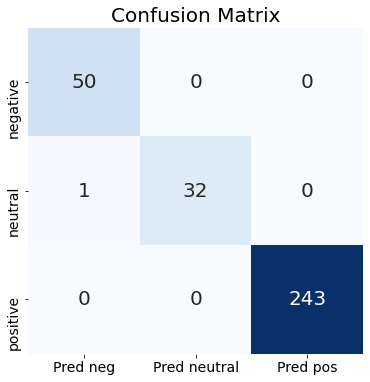

In [47]:

conmat = np.array(confusion_matrix(y_test, rf.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['negative', 'neutral', 'positive'],\
                     columns=['Pred neg', 'Pred neutral', 'Pred pos'])

plt.figure(figsize = (6,6))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)
plt.savefig('ConfusionMatric.png')


In [48]:
# SAVE THIS MANUALLY TO A PICTURE
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99        50
     Neutral       1.00      0.97      0.98        33
    Positive       1.00      1.00      1.00       243

    accuracy                           1.00       326
   macro avg       0.99      0.99      0.99       326
weighted avg       1.00      1.00      1.00       326



In [189]:
df = df_distinct.copy()
df['ShortText'] = df['Forum_Post_Raw'].str[:50]
df.dtypes

Forum ID                     int64
Forum Name                  object
Subject                     object
Post Date                   object
User DisplayName            object
Forum_Post_Raw              object
compound                   float64
neg                        float64
neu                        float64
pos                        float64
Sentiment                   object
PostDate            datetime64[ns]
DayName                     object
DayOfMonth                   int64
ShortText                   object
dtype: object

In [190]:
df.set_index('PostDate', inplace=True)

In [191]:
df.head(1)

,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment,DayName,DayOfMonth,ShortText
PostDate,,,,,,,,,,,,,,
2019-10-10 05:58:05.730,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral,Thursday,10,Company upgraded to windows 10. Used to run an...


In [192]:
df2 = df.sort_values(['PostDate']).copy()


In [53]:
fig = px.line(df2, x='Post Date', y='neg')
fig.show()

In [54]:
fig = px.line(df2, x='Post Date', y='pos', color='Sentiment')
fig.show()

In [55]:
# fig = go.figure(
#     go.Table(
#         columnwidth = [50,300,60,40,40],
#         header=dict(
#             values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#             font=dict(size=10),
#             align="left"
#         ),
#         # cells=dict(
#         #     values=[tweets[["created_at","text", "screen_name", "neg", "neu", "pos"]]],
#         #     align = "left")
#         cells=dict(values=[df['Post Date'], df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                 fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
#                 align=['left', 'left', 'left', 'center', 'center', 'center'])        
#     ),
#     row=1, col=1
# )
# fig.update_layout(
#     height=800,
#     showlegend=False,
#     title_text="Twitter Sentiment for " + GraphTitle,
# )
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'
alignment = ['left', 'left', 'left', 'center', 'center', 'center']

fig = go.Figure(data=[go.Table(
    columnwidth = [30,300,60,40,40],
    header=dict(values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
                fill_color=headerColor,
                align=alignment),
    cells=dict(values=[df['PostDate'].dt.strftime("%m/%d/%y %H:%M:%S"), df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
               fill_color = [[rowOddColor,rowEvenColor]*df.shape[0]],
               align=alignment))
])

fig.show()

KeyError: 'PostDate'

In [57]:
# headerColor = 'grey'
# rowEvenColor = 'lightgrey'
# rowOddColor = 'white'

# # for i, row in enumerate(df_Forum["Post Date"]):
# #     p = re.compile(" 00:00:00")
# #     datetime = p.split(df["Post Date"][i])[0]
# #     df.iloc[i, 1] = datetime

# fig = make_subplots(
#     rows=3, cols=1,
#     shared_xaxes=True,
#     vertical_spacing=0.03,
#     specs=[[{"type": "table"}],
#            [{"type": "scatter"}],
#            [{"type": "scatter"}]]
# )

# fig.add_trace(
#     go.Scatter(
#         x=df["Post Date"],
#         y=df["pos"],
#         mode="lines",
#         name="Positive Sentiment"
#     ),
#     row=3, col=1
# )

# fig.add_trace(
#     go.Scatter(
#         x=df["Post Date"],
#         y=df["neg"],
#         mode="lines",
#         name="Negative Sentiment"
#     ),
#     row=2, col=1
# )

# fig.add_trace(
#     go.Table(
#         columnwidth = [50,300,60,40,40],
#         header=dict(
#             values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#             font=dict(size=10),
#             align="left"
#         ),
#         # cells=dict(
#         #     values=[tweets[["created_at","text", "screen_name", "neg", "neu", "pos"]]],
#         #     align = "left")
#         cells=dict(values=[df['Post Date'], df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                 fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
#                 align=['left', 'left', 'left', 'center', 'center', 'center'])        
#     ),
#     row=1, col=1
# )
# fig.update_layout(
#     height=800,
#     showlegend=False,
#     title_text="Twitter Sentiment for " + GraphTitle,
# )

# fig.write_html('Sentiment.html')
# fig.show()

In [58]:
features = ['Forum_Post_Raw','neg','neu','pos']

# Top 5 Neutral Tweets
dfNeu = df[features].sort_values("neu", ascending=False).head(5)
dfNeu.name = "Neutral"

# Top 5 Negative Tweets
dfNeg = df[features].sort_values("neg", ascending=False).head(5)
dfNeg.name = "Negative"

# Top 5 Positive Tweets
dfPos = df[features].sort_values("pos", ascending=False).head(5)
dfPos.name = "Positive"
dataSets = [dfNeu,dfPos, dfNeg]


In [59]:
df.describe()

,Forum ID,compound,neg,neu,pos,DayOfMonth
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
mean,91.429098,0.358396,0.039499,0.853801,0.105767,15.840700
std,155.599403,0.520617,0.053476,0.091070,0.076172,8.454238
min,40.000000,-0.997200,0.000000,0.000000,0.000000,1.000000
25%,40.000000,0.000000,0.000000,0.802000,0.050000,9.000000
50%,40.000000,0.495150,0.018000,0.862500,0.098000,16.000000
75%,40.000000,0.805275,0.064000,0.916000,0.152000,23.000000
max,673.000000,0.989500,0.415000,1.000000,0.394000,31.000000


In [60]:
# Alternative way to make tables, doesn't work as well!
# import plotly.figure_factory as ff

# def WriteTable(dataSets):
#     for frame in dataSets:
#         fig =  ff.create_table(frame)
#         fig.write_html(frame.name+".html")
#         fig.show()

# WriteTable(dataSets)

In [61]:

import plotly.graph_objects as go
import pandas as pd

def WriteMyTable(dataSets):
    for frame in dataSets:
        headerColor = 'grey'
        rowEvenColor = 'lightgrey'
        rowOddColor = 'white'

        fig = go.Figure(data=[go.Table(
            columnwidth = [300,40,40,40],
            header=dict(values=[x for x in features],
                        fill_color='#39416C',                
                        font=dict(color='white', size=12),
                        align=['left', 'center', 'center', 'center']),
            cells=dict(values=[frame.Forum_Post_Raw, frame.neg, frame.neu, frame.pos],
                    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
                    align=['left', 'center', 'center', 'center']))
        ])
        fig.update_layout(title=frame.name, width=1000, height=400)
        fig.write_html(frame.name+".html")
        fig.show()

WriteMyTable(dataSets)


# Charting Ideas
1. Top pos / neg post by user
2. Trend line over time (SNS) color = user
- Does it match up to release dates or seasonal timings? 
- Was there a bad release?
- Was there a good release?
- Can we classify based on tags?

3. PCA analysis
4. Felix analysis (lda): https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc
5. Prediction of nltk accuracy chart?

# Latent Dirichlet Allocation (LDA) Analysis

Three main parameters of the model
1. Number of topics
2. Number of words per topic
3. Number of topics per document

In [145]:
! pip install gensim
! pip install langdetect
from gensim import corpora, models
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from gensim.models import Phrases
from gensim import corpora
from gensim import models
import numpy as np


import nltk
nltk.download('averaged_perceptron_tagger')
from itertools import chain # to flatten list of sentences of tokens into list of tokens


dfLDA = df2.copy()



<ipython-input-145-2022bc752b0e>:6: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



0it [00:00, ?it/s]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [146]:
# dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
# dictionary_LDA.filter_extremes(no_below=3)
# corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

# num_topics = 20
# %time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
#                                   id2word=dictionary_LDA, \
#                                   passes=4, alpha=[0.01]*num_topics, \
#                                   eta=[0.01]*len(dictionary_LDA.keys()))

## Tokenization

In [147]:
dfLDA['sentences'] = dfLDA.Forum_Post_Raw.progress_map(sent_tokenize)
dfLDA['sentences'].head(1).tolist()[0][:3]

  0%|          | 0/1086 [00:00<?, ?it/s]

['Company upgraded to windows 10.',
 'Used to run an ERP program which no one heard about, made by U8Soft (keep in mind that the company is in China).',
 'They are now asking for an insanely high amount of money to get it to work on windows 10.']

In [148]:
dfLDA['token_sentences'] = dfLDA['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(dfLDA['token_sentences'].head(1).tolist()[0][:3])

  0%|          | 0/1086 [00:00<?, ?it/s]

[['Company', 'upgraded', 'to', 'windows', '10', '.'], ['Used', 'to', 'run', 'an', 'ERP', 'program', 'which', 'no', 'one', 'heard', 'about', ',', 'made', 'by', 'U8Soft', '(', 'keep', 'in', 'mind', 'that', 'the', 'company', 'is', 'in', 'China', ')', '.'], ['They', 'are', 'now', 'asking', 'for', 'an', 'insanely', 'high', 'amount', 'of', 'money', 'to', 'get', 'it', 'to', 'work', 'on', 'windows', '10', '.']]


In [149]:
dfLDA['tokens_sentences'] = dfLDA['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(dfLDA['tokens_sentences'].head(1).tolist()[0][:3])

  0%|          | 0/1086 [00:00<?, ?it/s]

[['Company', 'upgraded', 'to', 'windows', '10', '.'], ['Used', 'to', 'run', 'an', 'ERP', 'program', 'which', 'no', 'one', 'heard', 'about', ',', 'made', 'by', 'U8Soft', '(', 'keep', 'in', 'mind', 'that', 'the', 'company', 'is', 'in', 'China', ')', '.'], ['They', 'are', 'now', 'asking', 'for', 'an', 'insanely', 'high', 'amount', 'of', 'money', 'to', 'get', 'it', 'to', 'work', 'on', 'windows', '10', '.']]


## Lemmatize with POS tagging

In [150]:
dfLDA['POS_tokens'] = dfLDA['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(dfLDA['POS_tokens'].head(1).tolist()[0][:3])


  0%|          | 0/1086 [00:00<?, ?it/s]

[[('Company', 'NN'), ('upgraded', 'VBD'), ('to', 'TO'), ('windows', 'VB'), ('10', 'CD'), ('.', '.')], [('Used', 'VBN'), ('to', 'TO'), ('run', 'VB'), ('an', 'DT'), ('ERP', 'NNP'), ('program', 'NN'), ('which', 'WDT'), ('no', 'DT'), ('one', 'NN'), ('heard', 'NN'), ('about', 'IN'), (',', ','), ('made', 'VBN'), ('by', 'IN'), ('U8Soft', 'NNP'), ('(', '('), ('keep', 'VB'), ('in', 'IN'), ('mind', 'NN'), ('that', 'IN'), ('the', 'DT'), ('company', 'NN'), ('is', 'VBZ'), ('in', 'IN'), ('China', 'NNP'), (')', ')'), ('.', '.')], [('They', 'PRP'), ('are', 'VBP'), ('now', 'RB'), ('asking', 'VBG'), ('for', 'IN'), ('an', 'DT'), ('insanely', 'RB'), ('high', 'JJ'), ('amount', 'NN'), ('of', 'IN'), ('money', 'NN'), ('to', 'TO'), ('get', 'VB'), ('it', 'PRP'), ('to', 'TO'), ('work', 'VB'), ('on', 'IN'), ('windows', 'NNS'), ('10', 'CD'), ('.', '.')]]


In [151]:
# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [152]:
# Lemmatizing each word with its POS tag, in each sentence
dfLDA['tokens_sentences_lemmatized'] = dfLDA['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

  0%|          | 0/1086 [00:00<?, ?it/s]

In [153]:
dfLDA['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]


[['Company', 'upgrade', 'to', 'windows', '10', '.'],
 ['Used',
  'to',
  'run',
  'an',
  'ERP',
  'program',
  'which',
  'no',
  'one',
  'heard',
  'about',
  ',',
  'make',
  'by',
  'U8Soft',
  '(',
  'keep',
  'in',
  'mind',
  'that',
  'the',
  'company',
  'be',
  'in',
  'China',
  ')',
  '.'],
 ['They',
  'be',
  'now',
  'ask',
  'for',
  'an',
  'insanely',
  'high',
  'amount',
  'of',
  'money',
  'to',
  'get',
  'it',
  'to',
  'work',
  'on',
  'window',
  '10',
  '.']]

## Regrouping tokens and removing stop words

In [154]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other


In [155]:
dfLDA['tokens'] = dfLDA['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
dfLDA['tokens'] = dfLDA['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])


In [156]:
dfLDA['tokens'].head(1).tolist()[0][:30]


['company',
 'upgrade',
 'windows',
 'used',
 'run',
 'erp',
 'program',
 'heard',
 'keep',
 'mind',
 'company',
 'china',
 'ask',
 'insanely',
 'high',
 'amount',
 'money',
 'work',
 'window',
 'try',
 'instal',
 'window',
 'ca',
 'select',
 'server',
 'drop',
 'menu',
 'almost',
 'network',
 'list']

## Data Preparation

In [157]:
tokens = dfLDA['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])


In [158]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]


In [165]:
np.random.seed(123456)
num_topics = 20

%time lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary_LDA.keys()))



Wall time: 2.67 s


In [166]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.027*"create" + 0.016*"error" + 0.014*"try" + 0.014*"supplier" + 0.012*"set" + 0.010*"view" + 0.010*"data" + 0.010*"base" + 0.009*"receipt" + 0.009*"customer" + 0.008*"type" + 0.008*"record" + 0.008*"run" + 0.008*"formula" + 0.007*"work" + 0.007*"product" + 0.007*"process" + 0.007*"table" + 0.006*"invoice" + 0.006*"import_template"

1: 0.029*"create" + 0.025*"user" + 0.014*"field" + 0.013*"update" + 0.013*"order" + 0.012*"screen" + 0.012*"hi" + 0.011*"po" + 0.009*"thanks" + 0.009*"add" + 0.008*"table" + 0.008*"action" + 0.008*"able" + 0.007*"sage" + 0.007*"signature" + 0.007*"set" + 0.007*"new" + 0.007*"call" + 0.007*"error" + 0.006*"look"

2: 0.019*"error" + 0.019*"system" + 0.015*"create" + 0.013*"change" + 0.012*"try" + 0.011*"product" + 0.011*"run" + 0.011*"show" + 0.010*"folder" + 0.010*"lot" + 0.009*"order" + 0.008*"date" + 0.008*"customer" + 0.008*"stock" + 0.007*"hi" + 0.007*"value" + 0.007*"task" + 0.007*"report" + 0.007*"update" + 0.007*"help"

3: 0.019*"product" + 0.017*

In [174]:
## Allocation topics to documents
dfLDA.head(1)


,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment,DayName,DayOfMonth,ShortText,sentences,token_sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
PostDate,,,,,,,,,,,,,,,,,,,,
2019-10-10 05:58:05.730,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral,Thursday,10,Company upgraded to windows 10. Used to run an...,"[Company upgraded to windows 10., Used to run ...","[[Company, upgraded, to, windows, 10, .], [Use...","[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr..."


In [175]:
lda_model[corpus[0]]

[(1, 0.39815605), (10, 0.42754552), (14, 0.16972747)]

## Predict based on input

# Advanced exploration of LDA result
## Allocation of topics in all documents

In [178]:
topics = [lda_model[corpus[i]] for i in range(len(dfLDA))]

In [179]:

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [180]:
topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038537,NaN,NaN,NaN,NaN,NaN,0.091301,NaN,NaN,0.869287,NaN


In [181]:

# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [182]:
# Which document are about topic 14
document_topic.sort_values(14, ascending=False)[14].head(20)

176     0.996289
434     0.995796
343     0.994751
1030    0.994444
153     0.993493
659     0.992747
642     0.992747
764     0.992747
591     0.992460
587     0.992460
338     0.992460
576     0.992148
282     0.991441
914     0.991440
558     0.990103
152     0.990103
384     0.990103
41      0.989560
119     0.989560
551     0.988953
Name: 14, dtype: float64

In [185]:
print(dfLDA.articles.loc[176][:1000])

AttributeError: 'DataFrame' object has no attribute 'articles'